In [2]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

### Question 1 

In [23]:
# Defining the coefficients
beta_0 = 50    # Intercept
beta_1 = 20    # Coefficient for GPA
beta_2 = 0.07  # Coefficient for IQ
beta_3 = 35    # Coefficient for Level (College)
beta_4 = 0.01  # Coefficient for product of GPA and IQ
beta_5 = -10   # Coefficient for product of GPA and Level

In [36]:
# Function to predict salary
def predict_salary(gpa, iq, level):
    # Calculate the products
    x4 = (gpa * iq)           # Product of GPA and IQ
    x5 = (gpa * level)       # Product of GPA and Level (1 for College, 0 for High School)
    
    # Calculate the salary using the linear model
    salary = beta_0 + beta_1 * gpa + beta_2 * iq + beta_3 * level + beta_4 * x4 + beta_5 * x5
    
    return salary



In [39]:
# Example values
gpa = 4.0      # GPA X1
iq = 110       # IQ X2
level = 1      # Level (1 for College, 0 for High School) X3

In [40]:
# Predict the salary
predicted_salary = predict_salary(gpa, iq, level)
print(f"The predicted salary of a college graduate with a GPA of {gpa} and an IQ of {iq} is: ${predicted_salary * 1000:.2f}")

The predicted salary of a college graduate with a GPA of 4.0 and an IQ of 110 is: $137100.00


### Question 2

In [7]:
#Question 2a

# Define coefficients
beta_0 = -6
beta_1 = 0.05
beta_2 = 1

In [8]:
# Function to calculate probability of receiving an A
def probability_of_A(hours_studied, gpa):
    linear_predictor = beta_0 + beta_1 * hours_studied + beta_2 * gpa
    probability = 1 / (1 + np.exp(-linear_predictor))
    return probability

In [9]:
hours_studied_a = 40
gpa_a = 3.5
prob_a = probability_of_A(hours_studied_a, gpa_a)
print(f"The estimated probability of getting an A is: {prob_a:.4f}")

The estimated probability of getting an A is: 0.3775


In [10]:
#Question 2b

# Part b: Calculate hours needed for 50% chance
def hours_for_50_percent_chance(gpa):
    hours_needed = (-beta_0 - beta_2 * gpa) / beta_1
    return hours_needed

In [11]:
# Calculate hours needed for a GPA of 3.5
gpa_b = 3.5
hours_needed_b = hours_for_50_percent_chance(gpa_b)
print(f"Hours needed to have a 50% chance of getting an A: {hours_needed_b:.2f} hours")

Hours needed to have a 50% chance of getting an A: 50.00 hours


### Question 3


In [12]:
# Create the dataset
data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Green','Green', 'Blue', 'Blue', 'Red', 'Blue',  'Green', 'Red', 'Green','Green'],
    'Type': ['SUV', 'Minivan', 'Car', 'Minivan', 'Car', 'SUV', 'SUV', 'Car', 'SUV', 'Car', 'SUV', 'Car','SUV', 'Minivan'],
    'Doors': [2, 4, 4, 4, 2, 4, 2, 2, 2, 4, 4, 2, 2, 4],
    'Tires': ['Whitewall', 'Whitewall', 'Whitewall', 'Blackwall', 'Blackwall', 'Blackwall', 'Blackwall', 'Whitewall', 'Blackwall', 'Blackwall', 'Whitewall', 'Blackwall', 'Blackwall', 'Whitewall'],
    'Class': ['+', '-','-','-', '+', '-', '-', '+', '-', '-', '+','+', '-','-']
}

df = pd.DataFrame(data)
print(df)

    Color     Type  Doors      Tires Class
0     Red      SUV      2  Whitewall     +
1    Blue  Minivan      4  Whitewall     -
2   Green      Car      4  Whitewall     -
3     Red  Minivan      4  Blackwall     -
4   Green      Car      2  Blackwall     +
5   Green      SUV      4  Blackwall     -
6    Blue      SUV      2  Blackwall     -
7    Blue      Car      2  Whitewall     +
8     Red      SUV      2  Blackwall     -
9    Blue      Car      4  Blackwall     -
10  Green      SUV      4  Whitewall     +
11    Red      Car      2  Blackwall     +
12  Green      SUV      2  Blackwall     -
13  Green  Minivan      4  Whitewall     -


In [13]:
# Convert categorical features to numerical
df_encoded = pd.get_dummies(df[['Color', 'Type', 'Doors', 'Tires']])

In [14]:
# Convert Class to binary (1 for positive, 0 for negative)
df_encoded['Class'] = df['Class'].apply(lambda x: 1 if x == '+' else 0)

In [15]:
# Split features and target
X = df_encoded.drop('Class', axis=1)
y = df_encoded['Class']

In [16]:
# Plotting function
def plot_tree(clf, title):
    plt.figure(figsize=(12,8))
    tree.plot_tree(clf, feature_names=X.columns, class_names=['Negative', 'Positive'], filled=True)
    plt.title(title)
    plt.show()

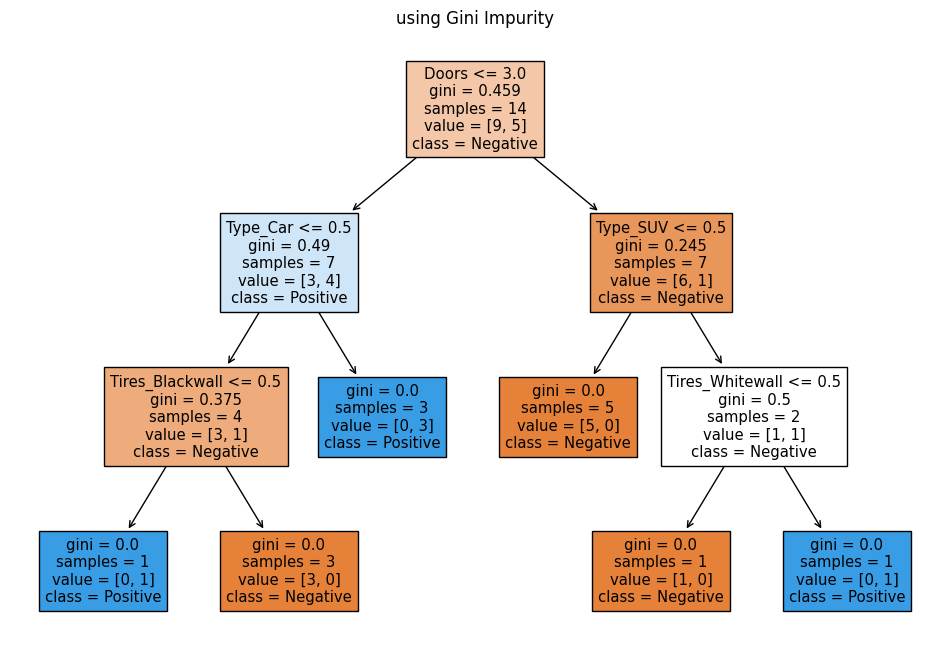

In [41]:
# Train and plot Decision Tree using different criteria
# 1. Using Gini Impurity
clf_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
clf_gini.fit(X, y)
plot_tree(clf_gini, "using Gini Impurity")


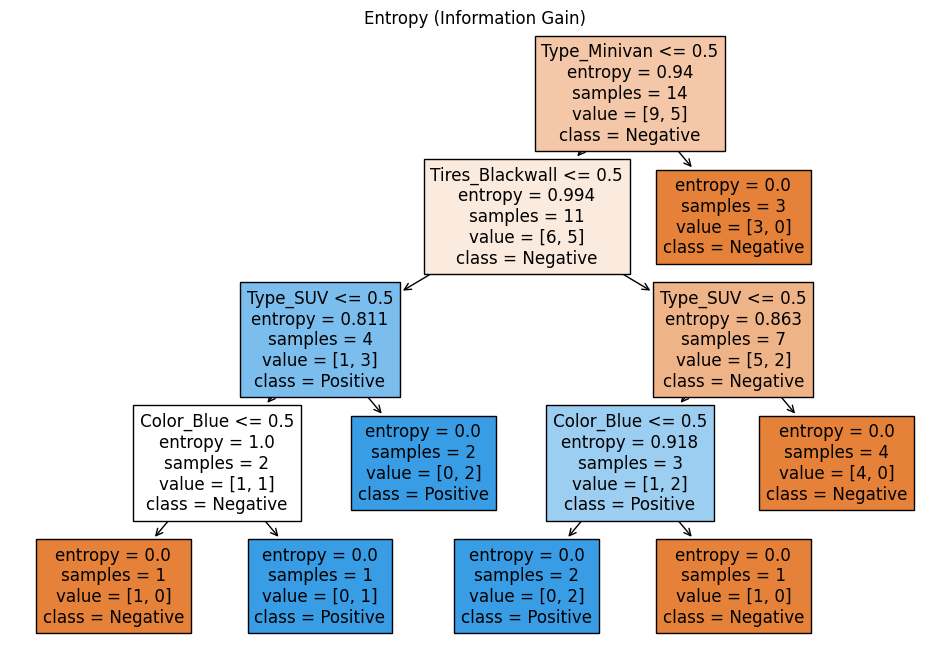

In [42]:
# 2. Using Entropy (Information Gain)
clf_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
clf_entropy.fit(X, y)
plot_tree(clf_entropy, "Entropy (Information Gain)")

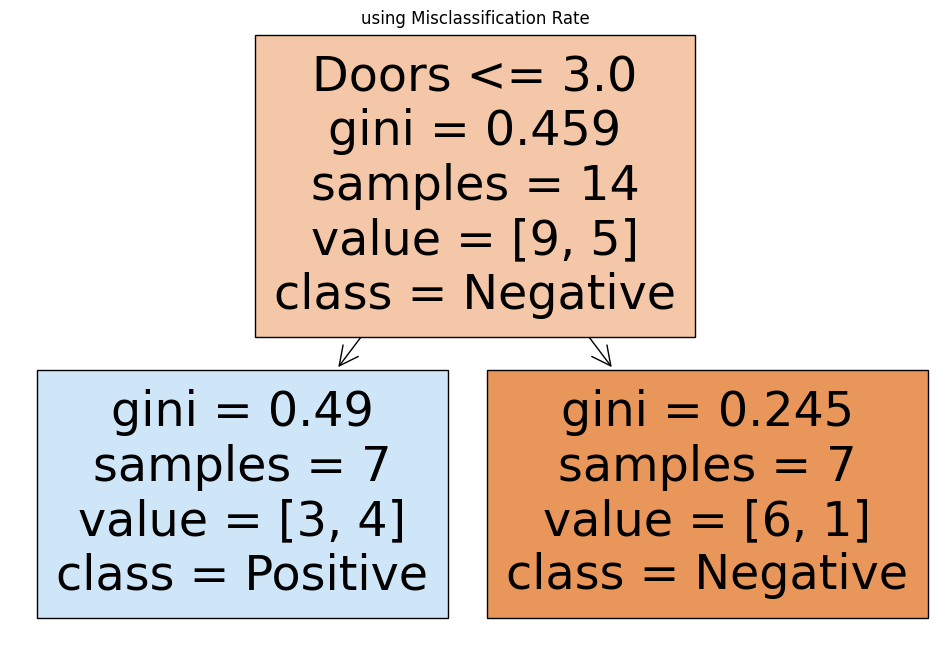

In [43]:
# Misclassification rate is not directly available in scikit-learn, 
# but we can implement a workaround by training trees with small depth.
# Here, depth = 1 will often approximate misclassification rate since it looks for
# majority class splits.
# 3. Using approximate Misclassification Rate (via max_depth = 1)
clf_misclassification = DecisionTreeClassifier(criterion='gini', max_depth=1, random_state=42)
clf_misclassification.fit(X, y)
plot_tree(clf_misclassification, "using Misclassification Rate")

### Question 4 

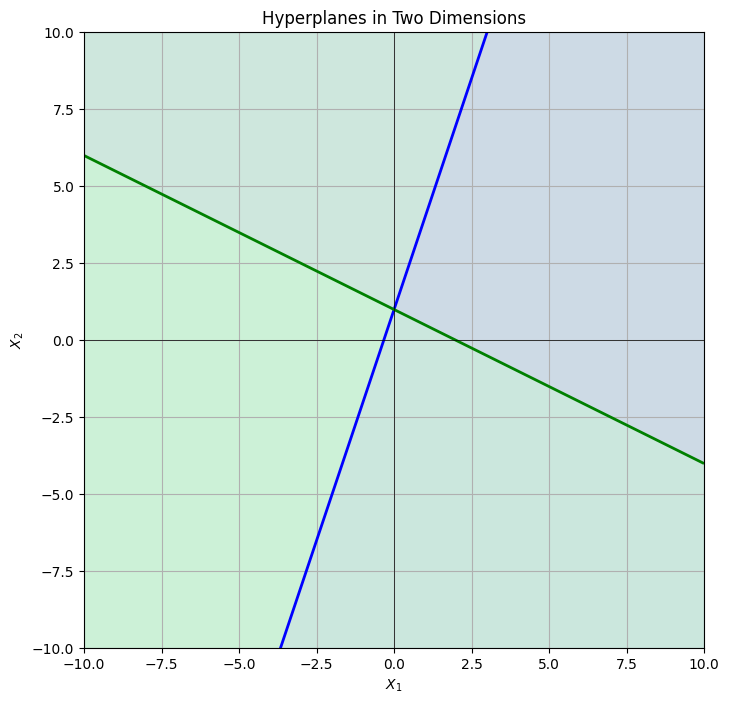

In [45]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid for X1 and X2
x1_vals = np.linspace(-10, 10, 400)
x2_vals = np.linspace(-10, 10, 400)
X1, X2 = np.meshgrid(x1_vals, x2_vals)

# Equation 1: 1 + 3X1 − X2 = 0
Z1 = 1 + 3*X1 - X2

# Equation 2: −2 + X1 + 2X2 = 0
Z2 = -2 + X1 + 2*X2

# Plotting
plt.figure(figsize=(8, 8))

# Plot the first hyperplane
plt.contour(X1, X2, Z1, levels=[0], colors='blue', linewidths=2)
plt.contourf(X1, X2, Z1, levels=[-100, 0], colors=['lightblue'], alpha=0.3)
plt.contourf(X1, X2, Z1, levels=[0, 100], colors=['blue'], alpha=0.1)

# Plot the second hyperplane
plt.contour(X1, X2, Z2, levels=[0], colors='green', linewidths=2)
plt.contourf(X1, X2, Z2, levels=[-100, 0], colors=['lightgreen'], alpha=0.3)
plt.contourf(X1, X2, Z2, levels=[0, 100], colors=['green'], alpha=0.1)

# Labels and legend
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.xlabel(r'$X_1$')
plt.ylabel(r'$X_2$')
plt.title('Hyperplanes in Two Dimensions')

# Display the plot
plt.grid(True)
plt.show()

### Question 5